**E-commerce Customers Clustering | Sentiment and Sales Analysis**

*Mona Vahdat*

**Objective:**
The rise of the Internet has caused most of the people are more willing to shop through the Internet, so there is no doubt that e-commerce platforms are one of the most powerful ways for any kind of business to communicate with each other. E-commerce has grown at an incredible rate in the past decades, so the competition between the online marketplaces to become the best one is increasing. Since customers play a significant role in this industry, it is important to have a better understanding of them. There are some potential aspects that with working on them may help companies to have a better perspective about customers.

**Golas:**
In this project we are going to see the unspurevised customers clustering based on their payment information from a Brizillian e-commerce dataset. In the following, we have an observation on the sales during a year to see in what time of the year the online marketpalce sold most, and at the end we train a model to predict whether the customers' reviews have a good or bad sentimnet.

**Dataset:** The dataset is taken from *kaggle.com*. The dataset has information of 100k orders from 2016 to 2018. We have a variety of information about customers, sellers, products, orders, and geolocations. 

Let's start with grabbing some libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Read all csv files into the separate dataframe:

customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocations_df = pd.read_csv('olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')

# Data Cleaning

> In this part, we are going to have a look at each dataframe. The steps are taken:
- View some rows of the dataframe
- View the shape (number of rows and columns)
- Looking for any NaN values
- Looking for any duplicated rows
- Looking at the information of each dataframe


> ## Customers Data

In [3]:
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
# We have 99441 customers and 5 columns which our features about customers
customers_df.shape

(99441, 5)

In [5]:
# No NAN values
customers_df_nan_values = customers_df.isna().sum()
customers_df_nan_values[customers_df_nan_values > 0]

Series([], dtype: int64)

In [6]:
# No duplicated rows
duplicated_rows_customers_df = customers_df[customers_df.duplicated()]
duplicated_rows_customers_df

Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customers_df.describe(include = 'all')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     120dd4afde62b0c8dfe915a1597950bd  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

In [9]:
customers_df['customer_id'].unique().shape

(99441,)

## Sellers Data

In [10]:
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [11]:
# We have 3095 sellers and 4 columns which our features about sellers
sellers_df.shape

(3095, 4)

In [12]:
# No NAN values
sellers_df_nan_values = sellers_df.isna().sum()
sellers_df_nan_values[sellers_df_nan_values > 0]

Series([], dtype: int64)

In [13]:
# No duplicated rows
duplicated_rows_sellers_df = sellers_df[sellers_df.duplicated()]
duplicated_rows_sellers_df

Empty DataFrame
Columns: [seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []

In [14]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [15]:
sellers_df.describe(include = 'all')

seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     8a43128d7f9a3db592b866e6861a6cce                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

## Products Data

In [16]:
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [17]:
# We have 32951 products and 9 columns which our features about products
products_df.shape

(32951, 9)

In [18]:
# We have some NAN values in our products dataset
# The most reasonable decision is to get rid of those rows contains NAN values, because we don't have any information about the features of specific products
products_df_nan_values = products_df.isna().sum()
products_df_nan_values[products_df_nan_values > 0]

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
products_df.dropna(inplace = True)

In [20]:
# There is no NAN anymore
products_df_nan_values = products_df.isna().sum()
products_df_nan_values[products_df_nan_values > 0]

Series([], dtype: int64)

In [21]:
# No duplicated rows
duplicated_rows_products_df = products_df[products_df.duplicated()]
duplicated_rows_products_df

Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

In [22]:
products_df_nan_values = products_df.isna().sum()
products_df_nan_values[products_df_nan_values > 0]

Series([], dtype: int64)

In [23]:
products_df.shape

(32340, 9)

> Now we need to translate product name to english using translation dataset.

In [24]:
portuguese_to_english = list(zip(product_category_name_translation_df.product_category_name,
                                 product_category_name_translation_df.product_category_name_english))

for word in portuguese_to_english:
    product_category_name_mask = products_df['product_category_name'].str.contains(word[0])
    products_df['product_category_name'][product_category_name_mask] = word[1]

C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# Add a new column named volume_cubed_cm which is a volume calculation of each product in centimeters
products_df['volume_cubed_cm'] = products_df['product_length_cm'] * \
                                 products_df['product_width_cm'] * \
                                 products_df['product_height_cm']

In [26]:
products_df.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery   
1  3aa071139cb16b67ca9e5dea641aaa2f                   art   
2  96bd76ec8810374ed1b65e291975717f        sports_leisure   
3  cef67bcfe19066a932b7673e239eb23d                  baby   
4  9dc1a7de274444849c219cff195d0b71            housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

   volume_cubed_cm  
0           2240.0  
1          10800.0  
2           2430.0  
3           2704.0  
4           4420.0

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 10 columns):
product_id                    32340 non-null object
product_category_name         32340 non-null object
product_name_lenght           32340 non-null float64
product_description_lenght    32340 non-null float64
product_photos_qty            32340 non-null float64
product_weight_g              32340 non-null float64
product_length_cm             32340 non-null float64
product_height_cm             32340 non-null float64
product_width_cm              32340 non-null float64
volume_cubed_cm               32340 non-null float64
dtypes: float64(8), object(2)
memory usage: 2.7+ MB


In [28]:
products_df.describe(include = 'all')

product_id product_category_name  \
count                              32340                 32340   
unique                             32340                    65   
top     18297d6ba9247aa8fb22c28df54bbcd4        bed_bath_table   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32340.000000                32340.000000        32340.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476592                  771.492393            2.188961   
std               10.245699                  635.124831            1.736787   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32340.000000       32340.000000       32340.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.956586          30.854545          16.958813   
std          4279.291845          16.955965          13.636115   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  volume_cubed_cm  
count       32340.000000     32340.000000  
unique               NaN              NaN  
top                  NaN              NaN  
freq                 NaN              NaN  
mean           23.208596     16577.961286  
std            12.078762     27062.978147  
min             6.000000       168.000000  
25%            15.000000      2880.000000  
50%            20.000000      6860.000000  
75%            30.000000     18522.750000  
max           118.000000    296208.000000

## Orders Data

In [29]:
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


> We define a function that convert any data types into date time:

In [31]:
def to_datetime(df, column_names):
    for name in column_names:
        df[name] = pd.to_datetime(df[name])

In [32]:
to_datetime(orders_df, ['order_purchase_timestamp', 
                        'order_approved_at', 
                        'order_delivered_carrier_date', 
                        'order_delivered_customer_date',
                        'order_estimated_delivery_date'])

In [33]:
orders_df.shape

(99441, 8)

In [34]:
# We have some NAN values in our products dataset
# The most reasonable decision is to get rid of those rows contains NAN values, because we don't have any information about the features of specific products
orders_df_nan_values = orders_df.isna().sum()
orders_df_nan_values[orders_df_nan_values > 0]

order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

In [35]:
orders_df.dropna(how = 'any', inplace = True)

In [36]:
# No duplicated rows
duplicated_rows_orders_df = orders_df[orders_df.duplicated()]
duplicated_rows_orders_df

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

### Order Items Data

In [37]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [38]:
# We have no NAN values in our order items dataset
order_items_df_nan_values = order_items_df.isna().sum()
order_items_df_nan_values[order_items_df_nan_values > 0]

Series([], dtype: int64)

In [39]:
order_items_df.shape

(112650, 7)

In [40]:
# No duplicated rows
duplicated_rows_orders_df = order_items_df[order_items_df.duplicated()]
duplicated_rows_orders_df

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

In [41]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [42]:
to_datetime(order_items_df, ['shipping_limit_date'])

### Order Payments Data

In [43]:
order_payments_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [44]:
order_payments_df.shape

(103886, 5)

In [45]:
# We have no NAN values in our order payment dataset
order_items_df_nan_values = order_payments_df.isna().sum()
order_items_df_nan_values[order_items_df_nan_values > 0]

Series([], dtype: int64)

In [46]:
# No duplicated rows
duplicated_rows_orders_df = order_payments_df[order_payments_df.duplicated()]
duplicated_rows_orders_df

Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []

In [47]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Order Reviews Data

In [48]:
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

## Geolocations Data


In [49]:
geolocations_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [50]:
geolocations_df['geolocation_city'].value_counts()

sao paulo                           135800
rio de janeiro                       62151
belo horizonte                       27805
são paulo                            24918
curitiba                             16593
                                     ...  
jardim abc de goias                      1
antunes (igaratinga)                     1
praia grande (fundão) - distrito         1
campinal                                 1
socorro do piaui                         1
Name: geolocation_city, Length: 8011, dtype: int64

> From the code above, we can get that the importance of the cities based on the amount of the purchases. The first top 3 cities that most customers buy products are Saou Paulo, Rio De Janeiro, and Belo Horizonte. So, in the next step we are going to keep the information of these 3 cities and do the analysis based on these cities.

In [51]:
cities = ['sao paulo', 'rio de janeiro', 'belo horizonte']
city_mask_ = geolocations_df['geolocation_city'].isin(cities)


In [52]:
geolocations_df['geolocation_city'] = geolocations_df['geolocation_city'][city_mask_]

In [53]:
geolocations_df['geolocation_city'].value_counts()

sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
Name: geolocation_city, dtype: int64

# Visuliazation

> In this part we are going to visulize the top 10 cities that most of the purchase and sales are made:

## Customers vs Sellers

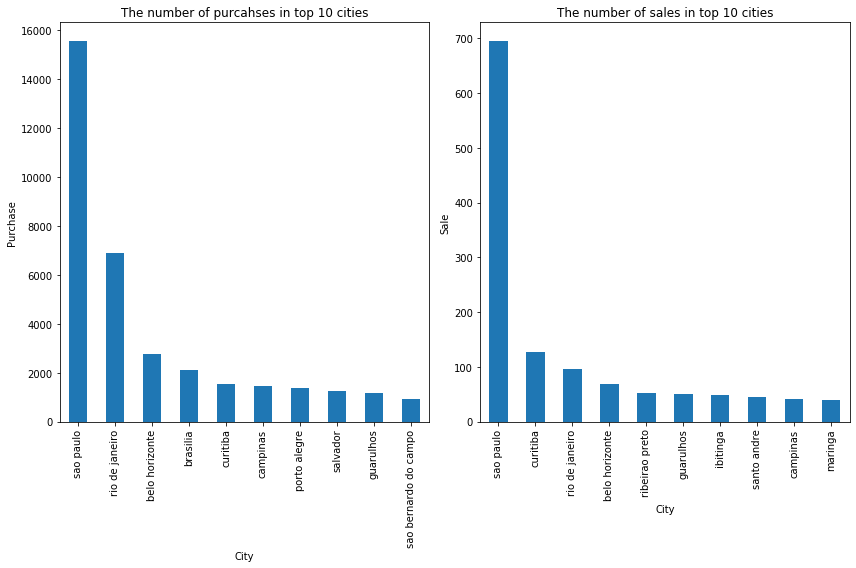

In [54]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
customers_df['customer_city'].value_counts()[:10].plot(kind = 'bar', figsize = (12, 8));
plt.xlabel('City')
plt.ylabel('Purchase')
plt.title('The number of purcahses in top 10 cities')
plt.subplot(1 ,2 ,2)
sellers_df['seller_city'].value_counts()[:10].plot(kind = 'bar', figsize = (12, 8));
plt.xlabel('City');
plt.ylabel('Sale');
plt.title('The number of sales in top 10 cities');
plt.tight_layout()

## Products

> Now, let's look at the top 10 categories that are most popular among customers:

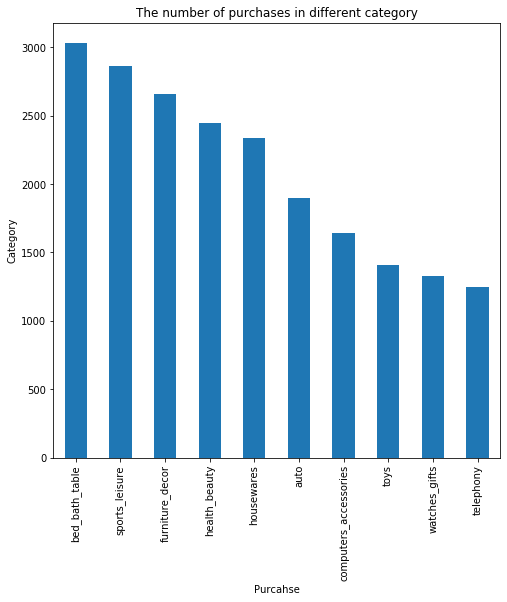

In [55]:
products_df['product_category_name'].value_counts()[:10].plot(kind = 'bar', figsize = (8, 8));
plt.xlabel('Purcahse');
plt.ylabel('Category');
plt.title('The number of purchases in different category');

> In this part we have an observation on the description and the name of the each products:

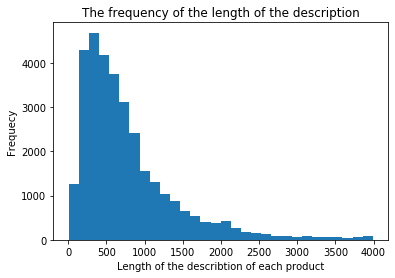

In [56]:
plt.figure()
plt.hist(products_df['product_description_lenght'], bins = 30)
plt.xlabel('Length of the describtion of each product');
plt.ylabel('Frequecy');
plt.title('The frequency of the length of the description');

> From the histogram above, we can see that most of the products' description are written around 500 to 700 characters.

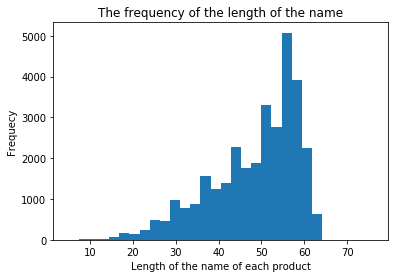

In [57]:
plt.figure()
plt.hist(products_df['product_name_lenght'], bins = 30)
plt.xlabel('Length of the name of each product');
plt.ylabel('Frequecy');
plt.title('The frequency of the length of the name');

> The length of the name of each product is around 45 characters.

## Keep top 3 cities information:

> In this project we are going to focus on the top 3 cities in which customers come from.

In [58]:
cities = ['sao paulo', 'rio de janeiro', 'belo horizonte']
city_mask = customers_df['customer_city'].isin(cities)
city_mask

0        False
1        False
2         True
3        False
4        False
         ...  
99436     True
99437    False
99438    False
99439    False
99440    False
Name: customer_city, Length: 99441, dtype: bool

In [59]:
customers_df['customer_city'] = customers_df['customer_city'][city_mask]

> Now, we have a dataframe contains customers information from the top 3 cities. But, we get a lot of NaN values from the cities not include the top 3, so we are going to remove those rows from our dataframe.

In [60]:
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix customer_city customer_state  
0                     14409           NaN             SP  
1                      9790           NaN             SP  
2                      1151     sao paulo             SP  
3                      8775           NaN             SP  
4                     13056           NaN             SP

In [61]:
customers_df.dropna(how = 'any', inplace = True)

In [62]:
customers_df.head()

customer_id                customer_unique_id  \
2   4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
6   fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
9   4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   
11  5aa9e4fdd4dfd20959cad2d772509598  2a46fb94aef5cbeeb850418118cee090   
13  eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   

    customer_zip_code_prefix   customer_city customer_state  
2                       1151       sao paulo             SP  
6                       4534       sao paulo             SP  
9                      30575  belo horizonte             MG  
11                     20231  rio de janeiro             RJ  
13                      5704       sao paulo             SP

In [63]:
customers_df.shape

(25195, 5)

In [64]:
customers_df.customer_city.unique()

array(['sao paulo', 'belo horizonte', 'rio de janeiro'], dtype=object)

# Gather information (merging dataframes):

## Orders

In [65]:
df = orders_df.merge(order_items_df, on = 'order_id')

In [66]:
orders_item_payments = df.merge(order_payments_df, on = 'order_id')

In [67]:
orders_item_payments.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   
3                    2018-08-13              1   
4                    2018-09-04              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

  shipping_limit_date   price  freight_value  payment_sequential payment_type  \
0 2017-10-06 11:07:15   29.99           8.72                   1  credit_card   
1 2017-10-06 11:07:15   29.99           8.72                   3      voucher   
2 2017-10-06 11:07:15   29.99           8.72                   2      voucher   
3 2018-07-30 03:24:27  118.70          22.76                   1       boleto   
4 2018-08-13 08:55:23  159.90          19.22                   1  credit_card   

   payment_installments  payment_value  
0                     1          18.12  
1                     1           2.00  
2                     1          18.59  
3                     1         141.46  
4                     3         179.12

In [68]:
orders_item_payments.shape

(115018, 18)

## Products and Orders

In [69]:
products_orders_df = orders_item_payments.merge(products_df, on = 'product_id')

In [70]:
products_orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   
3                    2017-08-28              1   
4                    2017-08-15              1   

                         product_id  ... payment_value product_category_name  \
0  87285b34884572647811a353c7ac498a  ...         18.12            housewares   
1  87285b34884572647811a353c7ac498a  ...          2.00            housewares   
2  87285b34884572647811a353c7ac498a  ...         18.59            housewares   
3  87285b34884572647811a353c7ac498a  ...         37.77            housewares   
4  87285b34884572647811a353c7ac498a  ...         37.77            housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

  product_weight_g  product_length_cm  product_height_cm product_width_cm  \
0            500.0               19.0                8.0             13.0   
1            500.0               19.0                8.0             13.0   
2            500.0               19.0                8.0             13.0   
3            500.0               19.0                8.0             13.0   
4            500.0               19.0                8.0             13.0   

   volume_cubed_cm  
0           1976.0  
1           1976.0  
2           1976.0  
3           1976.0  
4           1976.0  

[5 rows x 27 columns]

## Products, Orders, and Customers

In [71]:
products_orders_customers_df = products_orders_df.merge(customers_df, on = 'customer_id')

In [72]:
pd.set_option('display.max_columns', 40)
products_orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   
3                    2017-08-28              1   
4                    2017-08-15              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

  shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0 2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1 2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2 2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3 2017-08-21 20:05:16  29.99           7.78                   1  credit_card   
4 2017-08-08 18:37:31  29.99           7.78                   1  credit_card   

   payment_installments  payment_value product_category_name  \
0                     1          18.12            housewares   
1                     1           2.00            housewares   
2                     1          18.59            housewares   
3                     3          37.77            housewares   
4                     1          37.77            housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

   volume_cubed_cm                customer_unique_id  \
0           1976.0  7c396fd4830fd04220f754e42b4e5bff   
1           1976.0  7c396fd4830fd04220f754e42b4e5bff   
2           1976.0  7c396fd4830fd04220f754e42b4e5bff   
3           1976.0  3a51803cc0d012c3b5dc8b7528cb05f7   
4           1976.0

In [73]:
products_orders_customers_df.shape

(28824, 31)

In [74]:
# No duplicated rows
duplicated_rows_customers_df = products_orders_customers_df[products_orders_customers_df.duplicated()]
products_orders_customers_df = products_orders_customers_df.drop_duplicates()

In [75]:
products_orders_customers_df['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [76]:
# translate boleto in english
products_orders_customers_df['payment_type'] = \
                                             np.where(products_orders_customers_df['payment_type'] == \
                                             'boleto', 'billet', products_orders_customers_df['payment_type'])

In [77]:
products_orders_customers_df['payment_type'].value_counts()

credit_card    21795
billet          4970
voucher         1571
debit_card       488
Name: payment_type, dtype: int64

In [78]:
products_orders_customers_df['product_category_name'].value_counts()

bed_bath_table               3356
health_beauty                2607
sports_leisure               2214
furniture_decor              2211
housewares                   2102
                             ... 
party_supplies                  7
la_cuisine                      5
fashion_sport                   5
fashion_childrens_clothes       4
pc_gamer                        1
Name: product_category_name, Length: 64, dtype: int64

> By looking at the code above, we can see that there are a lot of categories some of which are related to each other, but they are in different category. In this part we are going to define some main categories that include all related categories. 

In [79]:
def name_mask (df, column_name, list_of_tuples_str_contains_and_desired_name):
    '''
    This fuction gets 3 parameters to change the names in whatever column's content
    '''
    for i, j in list_of_tuples_str_contains_and_desired_name:
        mask = df[column_name].str.contains(i)
        df[column_name][mask] = j

In [80]:
# We define a list pf tuples that contains the old name and the desired one:

old_and_new_names = [
                    ('game', 'computers'), ('food', 'food'),
                    ('appliance', 'appliances'), ('fashio', 'fashion'),
                    ('computer', 'electronics'), ('security', 'security'),
                    ('furniture', 'furniture'), ('construction', 'construction'),
                    ('book', 'book'), ('housewares', 'furniture'),
                    ('bed_bath_table', 'furniture'), ('costruction_tools_tools', 'construction'),
                    ('dvds_blu_ray', 'electronics'), ('tablets_printing_image', 'electronics'),
                    ('market_place', 'sports_leisure'), ('garden_tools', 'garden'),
                    ('flowers', 'garden'), ('party_supplies', 'cool_stuff'),
                    ('la_cuisine', 'sports_leisure'), ('books_general_interest', 'sports_leisure'),
                    ('diapers_and_hygiene', 'baby'), ('toys', 'baby'),
                    ('christmas_supplies', 'cool_stuff'), ('watches_gifts', 'cool_stuff'),
                    ('home_confort', 'appliances'), ('luggage_accessories', 'sports_leisure'),
                    ('perfumery', 'health_beauty'), ('commerce', 'industry_commerce'),
                    ('drink', 'food'), ('air_conditioning', 'appliances'),
                    ('cine_photo', 'electronics'), ('audio', 'electronics')
                    ]

name_mask(products_orders_customers_df, 'product_category_name', old_and_new_names)

C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
products_orders_customers_df.product_category_name.value_counts()

furniture            8517
health_beauty        3476
electronics          3193
sports_leisure       2545
cool_stuff           2277
baby                 1946
telephony            1008
garden                999
auto                  863
appliances            703
fashion               623
stationery            619
construction          530
pet_shop              499
food                  400
book                  197
music                 191
industry_commerce     118
security               61
art                    59
Name: product_category_name, dtype: int64

>In this project are going to keep categories that their popularity are more than 10% of the other one.

In [82]:
my_list = ['food',
          'music',
          'security',
          'art',
          'book',
          'industry_commerce',
          'construction',
          'fashion',
          'appliances',
          'stationery',
          'pet_shop']

for i in my_list:
    products_orders_customers_df = \
    products_orders_customers_df[~products_orders_customers_df['product_category_name'].str.contains(i)]

In [83]:
products_orders_customers_df.drop_duplicates()

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3      128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4      0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                 ...                               ...   
28819  add4f182072426430ee6c993eab97efe  b87639f5efd3e2316dca5dec5e2f88f4   
28820  f6f9344efc918f1e00ab84c014aa21d7  166478efeed4f9a861164b4ff5acfe8b   
28821  87b4c933f31145a28413b39d880ad6c3  ddfdf5e9b2659e1fbd073404c9b762e0   
28822  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
28823  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3        delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4        delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
...            ...                      ...                 ...   
28819    delivered      2018-01-24 02:23:00 2018-01-25 02:58:03   
28820    delivered      2017-05-20 11:43:49 2017-05-20 11:55:16   
28821    delivered      2018-03-02 17:12:05 2018-03-02 17:49:24   
28822    delivered      2017-08-10 21:21:07 2017-08-10 21:35:26   
28823    delivered      2017-08-10 21:21:07 2017-08-10 21:35:26   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2017-10-04 19:55:00           2017-10-10 21:25:13   
2              2017-10-04 19:55:00           2017-10-10 21:25:13   
3              2017-08-17 15:28:33           2017-08-18 14:44:43   
4              2017-08-04 17:35:43           2017-08-07 18:30:01   
...                            ...                           ...   
28819          2018-01-26 19:26:24           2018-01-29 23:33:51   
28820          2017-05-25 14:33:53           2017-06-06 16:10:52   
28821          2018-03-06 21:23:32           2018-03-16 17:21:55   
28822          2017-08-18 16:42:51           2017-08-23 15:36:29   
28823          2017-08-18 16:42:51           2017-08-23 15:36:29   

      order_estimated_delivery_date  order_item_id  \
0                        2017-10-18              1   
1                        2017-10-18              1   
2                        2017-10-18              1   
3                        2017-08-28              1   
4                        2017-08-15              1   
...                             ...            ...   
28819                    2018-02-08              1   
28820                    2017-06-21              1   
28821                    2018-03-21              1   
28822                    2017-08-31              1   
28823                    2017-08-31              2   

                             product_id                         seller_id  \
0      87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1      87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2      87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3      87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4      87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                 ...                               ...   
28819  e68ede48908dfec1ba4abbcdb86b420f  fa1c13f2614d7b5c4749cbc52fecda94   
28820  af87aa3f5f2c05c8c4db6bee2088672b  11305281b50fff20ae8bb473f8e11876   
28821  cbaf5898b92064cd5e399c7cff291d0a  06a2c3af7b3aee5d69171b0e14f0ee87   
28822  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c6

> Now, let's see the top 9 most favorite category among customers:

In [84]:
products_orders_customers_df['product_category_name'].value_counts()

furniture         8517
health_beauty     3476
electronics       3193
sports_leisure    2545
cool_stuff        2277
baby              1946
telephony         1008
garden             999
auto               863
Name: product_category_name, dtype: int64

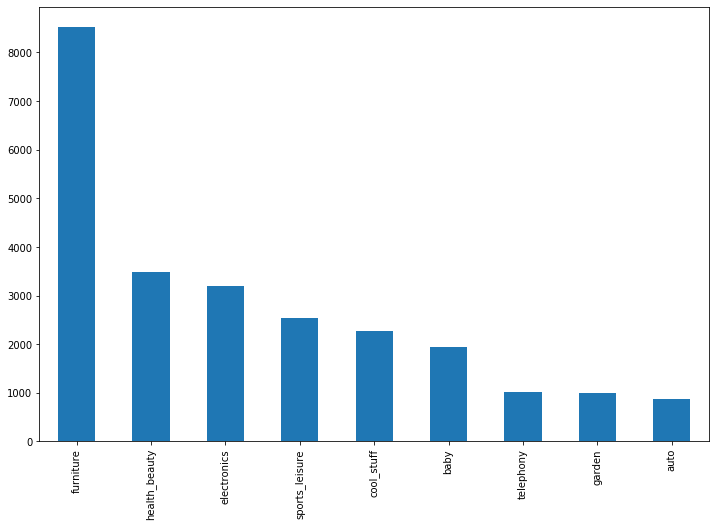

In [85]:
plt.figure(figsize = (8, 8))
products_orders_customers_df['product_category_name'].value_counts().plot(kind = 'bar', figsize = (12, 8));

# Sales Analysis

> We are going to see the time stamp as customers did their purchase, to find the amount of purchase during a year.

In [86]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [87]:
orders_df['order_purchase'] = orders_df['order_purchase_timestamp'].dt.date

In [88]:
purchase_year = orders_df.groupby('order_purchase')['customer_id'].count()
purchase_year.head()


order_purchase
2016-09-15     1
2016-10-03     8
2016-10-04    54
2016-10-05    35
2016-10-06    41
Name: customer_id, dtype: int64

In [89]:
purchase_year.index = pd.to_datetime(purchase_year.index)
purchase_year.head()

order_purchase
2016-09-15     1
2016-10-03     8
2016-10-04    54
2016-10-05    35
2016-10-06    41
Name: customer_id, dtype: int64

In [90]:
purchase_year_df = pd.DataFrame(purchase_year)
purchase_year_df.index = pd.to_datetime(purchase_year_df.index)
purchase_year_df.head()

customer_id
order_purchase             
2016-09-15                1
2016-10-03                8
2016-10-04               54
2016-10-05               35
2016-10-06               41

In [91]:
purchase_year_df = purchase_year_df.reset_index()
purchase_year_df.head()

order_purchase  customer_id
0     2016-09-15            1
1     2016-10-03            8
2     2016-10-04           54
3     2016-10-05           35
4     2016-10-06           41

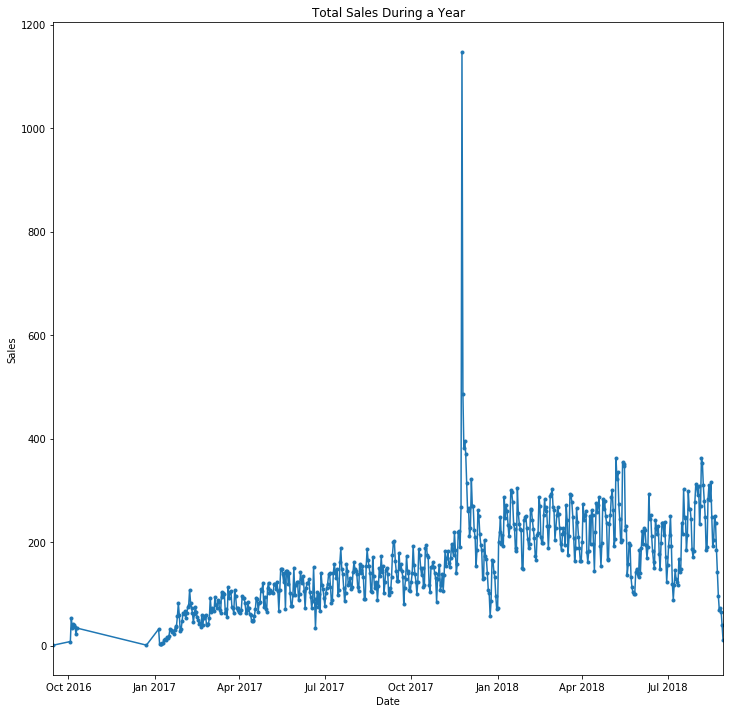

In [92]:
plt.figure(figsize=(12,12))
ax = plt.gca()
plt.plot(purchase_year, marker='.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales During a Year')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
plt.show();

> As the plot above shows, there was a huge peak between December and January. It means that, around this time more customers are going to buy something. Which is expected to see that because this time is near holidays.

> In this part the facbook prophet is used to have a better observation on sales.

In [95]:
from fbprophet import Prophet

In [96]:
purchase_year_df.set_axis(['ds', 'y'], axis=1, inplace = True)
purchase_year_df.head()

ds   y
0 2016-09-15   1
1 2016-10-03   8
2 2016-10-04  54
3 2016-10-05  35
4 2016-10-06  41

In [97]:
# Split the data into train and test
test_size = 100
test = purchase_year_df.iloc[-test_size:]
train = purchase_year_df.iloc[:-test_size]


In [98]:
fig_time_sales = go.Figure()
fig_time_sales.add_trace(go.Scatter(x=train['ds'], y=train['y'].values,
                    mode='lines+markers', name='train', line = dict(color='royalblue', width=2)
                    ))
fig_time_sales.add_trace(go.Scatter(x=test['ds'], y=test['y'].values,
                    mode='lines+markers', name='test', line = dict(color='red', width=2)
                    ))
fig_time_sales.update_layout(
    xaxis_title="Date",
    yaxis_title="Sales",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig_time_sales.show()

> Set a holiday variable which is contains the important date from December to January. It will use as a input for holiday argument.

In [99]:
holiday = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.to_datetime(['2018-12-01', '2018-12-02', '2018-12-08',
                        '2018-12-09', '2018-12-13', '2018-12-15',
                        '2018-12-16', '2018-12-22', '2018-12-23',
                        '2018-12-24', '2018-12-25', '2018-12-26',
                        '2018-12-27', '2018-12-28']),
 
})

In [100]:
model = Prophet(interval_width=0.95, holidays=holiday)
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
future = model.make_future_dataframe(periods=test_size, freq='D' ,include_history=False)

In [102]:
# We need to have a dataframe for the predict method, it must also contain a ds column
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


ds        yhat  yhat_lower  yhat_upper
0 2018-05-22  276.235817  161.965935  379.465560
1 2018-05-23  271.824133  157.201068  390.821944
2 2018-05-24  263.878875  152.375159  376.880191
3 2018-05-25  259.328649  154.517369  362.120562
4 2018-05-26  223.943489  111.248945  342.686285

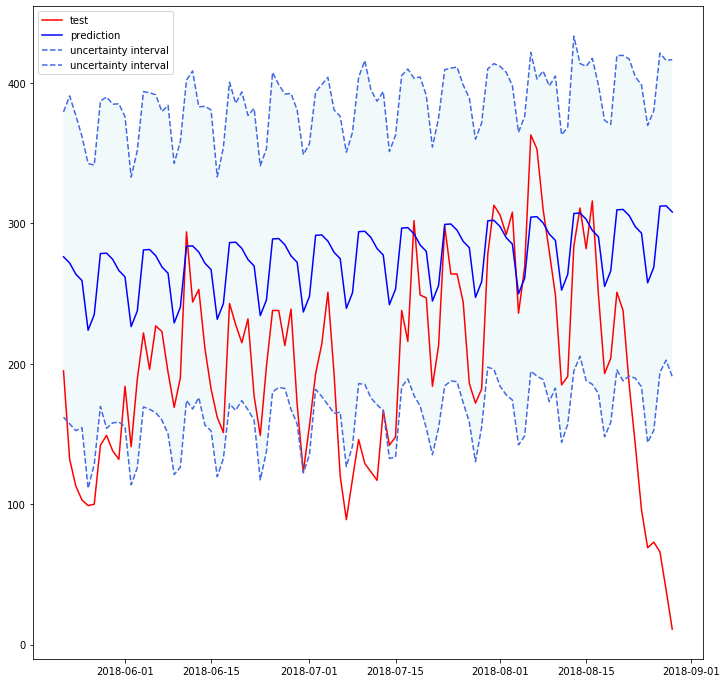

In [103]:
plt.figure(figsize = (12, 12))
plt.plot(test['ds'], test['y'].values, c="red", label="test")
plt.plot(test['ds'], forecast['yhat'].values, c="blue", label="prediction")
plt.plot(test['ds'], forecast['yhat_lower'].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.plot(test['ds'], forecast['yhat_upper'].values, c="royalblue", label="uncertainty interval", linestyle='--')
ax = plt.gca()
ax.fill_between(test['ds'],  forecast['yhat_lower'], forecast['yhat_upper'], facecolor='lightblue', alpha=0.15, interpolate=True)
plt.legend()
plt.show();

> From the plot above, red line is the actual values and blue trend is the prediction. In some areas, the prediction has a good match with the actual datapoints, but the blue line followed a patternal trend. It seems that there is a need to set more arguments with specific values to see the changes in prediction trend and come up with the best result. However, in this part we don't want to deep into the time-series analysis.

**Machine Learning:**


The methodologies we are going to use in this project are taken from scikit learn library as you can seen from below:

# Machine Learning Part

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer # Sentiment analysis part

# Libraries for visualizing
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Unsupervised Clustering

> Before define our fetures, we need to come up with features that are in categorical values. To do this we used get dummies method to convert the values from categorical to numerical.

### K-means

In [105]:
products_orders_customers_df = pd.get_dummies(products_orders_customers_df, columns = 
                                              ['payment_type',
                                               'product_category_name'
                                               ])

In [106]:
products_orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   
3                    2017-08-28              1   
4                    2017-08-15              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

  shipping_limit_date  price  freight_value  payment_sequential  \
0 2017-10-06 11:07:15  29.99           8.72                   1   
1 2017-10-06 11:07:15  29.99           8.72                   3   
2 2017-10-06 11:07:15  29.99           8.72                   2   
3 2017-08-21 20:05:16  29.99           7.78                   1   
4 2017-08-08 18:37:31  29.99           7.78                   1   

   payment_installments  payment_value  product_name_lenght  \
0                     1          18.12                 40.0   
1                     1           2.00                 40.0   
2                     1          18.59                 40.0   
3                     3          37.77                 40.0   
4                     1          37.77                 40.0   

   product_description_lenght  product_photos_qty  ...  product_height_cm  \
0                       268.0                 4.0  ...                8.0   
1                       268.0                 4.0  ...                8.0   
2                       268.0                 4.0  ...                8.0   
3                       268.0                 4.0  ...                8.0   
4                       268.0                 4.0  ...                8.0   

   product_width_cm  volume_cubed_cm                customer_unique_id  \
0              13.0           1976.0  7c396fd4830fd04220f754e42b4e5bff   
1              13.0           1976.0  7c396fd4830fd04220f754e42b4e5bff   
2              13.0           1976.0  7c396fd4830fd04220f754e42b4e5bff   
3              13.0           1976.0  3a51803cc0d012c3b5dc8b7528cb05f7   
4              13.0           1976.0  ef0996a1a279c26e7ecbd737be23d235   

   customer_zip_code_prefix customer_city  customer_state payment_type_billet  \
0                      3149     sao paulo              SP                   0   
1                      3149     sao paulo              SP                   0   
2                      3149     sao paulo              SP                   0   
3                      3366     sao paulo              SP             

In [107]:
products_orders_customers_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'volume_cubed_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_type_billet', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'product_category_name_auto', 'product_category_name_baby',
       'product_category_name_cool_stuff', 'product_category_name_electronics',
       'product_category_name_furniture', 'product_category_name_ga

> Specify which features is more related to customers in terms of how they can affect customers' behaviour:

In [108]:
products_orders_customers_df.corr()

order_item_id     price  freight_value  \
order_item_id                              1.000000 -0.056880      -0.041255   
price                                     -0.056880  1.000000       0.378731   
freight_value                             -0.041255  0.378731       1.000000   
payment_sequential                         0.014946 -0.019066       0.027728   
payment_installments                       0.048832  0.267361       0.169339   
payment_value                              0.243399  0.627341       0.247549   
product_name_lenght                       -0.030251  0.019749       0.016693   
product_description_lenght                -0.032286  0.198124       0.092657   
product_photos_qty                        -0.042324  0.058946       0.014916   
product_weight_g                          -0.008880  0.305167       0.683016   
product_length_cm                          0.001781  0.125347       0.370563   
product_height_cm                          0.019031  0.213782       0.434759   
product_width_cm                          -0.031266  0.146001       0.366519   
volume_cubed_cm                           -0.003692  0.277266       0.641821   
customer_zip_code_prefix                  -0.021184  0.026803       0.227744   
payment_type_billet                        0.052932 -0.036424      -0.012561   
payment_type_credit_card                  -0.036028  0.049602      -0.000671   
payment_type_debit_card                   -0.002752 -0.017529      -0.020764   
payment_type_voucher                      -0.018253 -0.023297       0.033618   
product_category_name_auto                -0.026648  0.009658      -0.011931   
product_category_name_baby                -0.043523  0.005910       0.005349   
product_category_name_cool_stuff          -0.049940  0.135391      -0.047197   
product_category_name_electronics          0.016304  0.011480      -0.038925   
product_category_name_furniture            0.079011 -0.089734       0.128773   
product_category_name_garden               0.010076 -0.015894       0.047182   
product_category_name_health_beauty       -0.004119  0.019159      -0.086800   
product_category_name_sports_leisure      -0.034275  0.001659       0.012434   
product_category_name_telephony           -0.010781 -0.039050      -0.084384   

                                      payment_sequential  \
order_item_id                                   0.014946   
price                                          -0.019066   
freight_value                                   0.027728   
payment_sequential                              1.000000   
payment_installments                           -0.082231   
payment_value                                  -0.053524   
product_name_lenght                             0.006432   
product_description_lenght                     -0.023336   
product_photos_qty                              0.004514   
product_weight_g                                0.029072   
product_length_cm                               0.050815   
product_height_cm                               0.037589   
product_width_cm                                0.031045   
volume_cubed_cm                                 0.028187   
customer_zip_code_prefix                       -0.021339   
payment_type_billet                            -0.057510   
payment_type_credit_card                       -0.216958   
payment_type_debit_card                        -0.014079   
payment_type_voucher                            0.511239   
product_category_name_auto                     -0.018417   
product_category_name_baby                     -0.016459   
product_category_name_cool_stuff               -0.029291   
product_category_name_electronics              -0.035047   
product_category_name_furniture                 0.103696   
product_category_name_garden                   -0.013473   
product_category_name_health_beauty            -0.035389   
product_category_name_sports_leisure           -0.013542   
product_category_name_telephony      

In [109]:
features_to_include = [
                      'product_weight_g',
                      'price',
                      'product_photos_qty',
                      'freight_value',
                      'volume_cubed_cm',
                      'payment_sequential',
                      'payment_installments',
                      'payment_value',
                      'payment_type_billet',
                      'payment_type_credit_card',
                      'payment_type_debit_card',
                      'payment_type_voucher',
                      'product_category_name_auto',
                      'product_category_name_baby',
                      'product_category_name_cool_stuff',
                      'product_category_name_electronics',
                      'product_category_name_furniture',
                      'product_category_name_garden',
                      'product_category_name_health_beauty',
                      'product_category_name_sports_leisure',
                      'product_category_name_telephony'
                      ]

In [110]:
scaler = StandardScaler()
scaler.fit(products_orders_customers_df[features_to_include])
X = scaler.transform(products_orders_customers_df[features_to_include])

In [111]:
X.shape

(24824, 21)

> At this stage by looking at the inertia value, we are going to see how many clusters would be better to have in the k-means clustering:

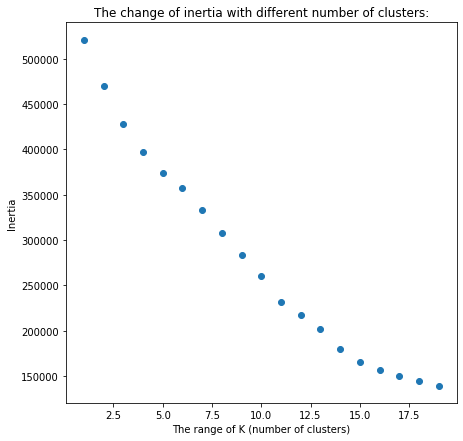

In [112]:
k_range = np.arange(1,20)

inertia_list = []

for k in k_range :
    
    #Specify the model
    k_means_model = KMeans(n_clusters = k, random_state = 1)
    k_means_model.fit(X)
    
    inertia_list.append(k_means_model.inertia_)
    print(k, end = '\r')

plt.figure(figsize = (7,7))
plt.scatter(k_range, inertia_list)
plt.title('The change of inertia with different number of clusters:')
plt.xlabel('The range of K (number of clusters)')
plt.ylabel('Inertia')
plt.show()

> As we can see from the scatter plot above, the amount of inertia is extremely high, so we couldn't decide on the number of clusters that we need for our model. So, the next step would be decreasing the dimensional of our features to 2 features:


### PCA

In [113]:
# Build and fit a PCA model
my_pca = PCA(n_components = 2, random_state = 1)

#Transform the data
X_PCA = my_pca.fit_transform(X)

In [114]:
my_pca.components_

array([[ 4.88650312e-01,  3.43701353e-01,  2.59674377e-02,
         4.61304183e-01,  4.77355014e-01,  1.76398716e-03,
         2.28711336e-01,  2.80330726e-01, -7.98974557e-02,
         9.04427943e-02, -4.23267782e-02, -1.43946494e-02,
        -6.45939622e-03,  1.51101488e-02, -8.14680782e-03,
        -9.46709224e-02,  1.68535778e-01,  1.58588415e-02,
        -9.54120271e-02, -7.01140432e-03, -8.47325091e-02],
       [ 1.39867160e-01, -9.32358209e-02, -1.10981981e-02,
         1.05206440e-01,  1.48346384e-01,  2.92406177e-01,
        -3.40377856e-01, -8.58289765e-02,  4.24224772e-01,
        -5.94546297e-01,  9.41546733e-02,  3.64342773e-01,
        -1.19989330e-02, -1.17262672e-02, -1.11421267e-01,
        -1.31979812e-02,  1.68009936e-01,  2.32401822e-02,
        -1.13390026e-01,  4.88411159e-04, -1.62145541e-02]])

In [115]:
#PCA_model = PCA().fit(X_PCA)

In [116]:
X_PCA.shape

(24824, 2)

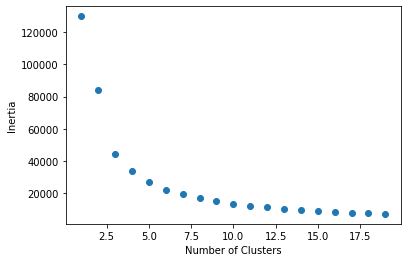

In [117]:
k_range = np.arange(1,20)

inertia_list = []

for k in k_range :
    
    #Specify the model
    k_means_model = KMeans(n_clusters = k, random_state = 1)
    k_means_model.fit(X_PCA)
    
    inertia_list.append(k_means_model.inertia_)
    print(k, end = '\r')
plt.scatter(k_range,inertia_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [118]:
#len(inertia_list)

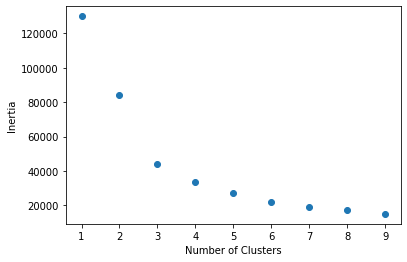

In [119]:
plt.figure()
plt.scatter(range(1,10),inertia_list[0:9])
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

> By reducing the dimension of the features using PCA, the amount of the inertia has changed in a good way. By looking at the plot above, it seems that if we have 2 to 5 clusters would be fine for our model.

>Let's try the different number of clusters and visualize the clusters to decide on the final number of clusters.

Text(0, 0.5, 'PCA Dimension 2')

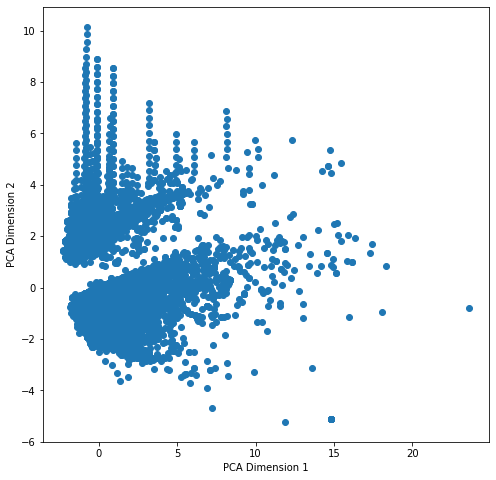

In [120]:
plt.figure(figsize=(8, 8))
plt.scatter(X_PCA[:,0],X_PCA[:,1])

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

In [121]:
k2_means_model = KMeans(n_clusters = 2, random_state = 1)
#Fit the model to the data
k2_means_model.fit(X_PCA);

k3_means_model = KMeans(n_clusters = 3, random_state = 1)
#Fit the model to the data
k3_means_model.fit(X_PCA);

k4_means_model = KMeans(n_clusters = 4, random_state = 1)
#Fit the model to the data
k4_means_model.fit(X_PCA);

k5_means_model = KMeans(n_clusters = 5, random_state = 1)
#Fit the model to the data
k5_means_model.fit(X_PCA);

In [122]:
k2_means_model.labels_
pred_labels2 = k2_means_model.labels_

k3_means_model.labels_
pred_labels3 = k3_means_model.labels_

k4_means_model.labels_
pred_labels4 = k4_means_model.labels_

k5_means_model.labels_
pred_labels5 = k5_means_model.labels_

> Now check the silhoutte score of different using number of clustering. It seems that having 3 clusters gives a better score on silhouette score, but visually having 2 clusters is more practical.

In [123]:
print(silhouette_score(X_PCA, pred_labels2))
print(silhouette_score(X_PCA, pred_labels3))
print(silhouette_score(X_PCA, pred_labels4))
print(silhouette_score(X_PCA, pred_labels5))

0.5422998929540715
0.6042094828374953
0.5176052974847161
0.466834715299024


In [124]:
my_gmm2 = GaussianMixture(n_components = 2, covariance_type='full')
my_gmm2.fit(X_PCA)
#Getting the labels
pred_labels_gmm2 = my_gmm2.predict(X_PCA)

my_gmm3 = GaussianMixture(n_components = 3, covariance_type='full')
my_gmm3.fit(X_PCA)
#Getting the labels
pred_labels_gmm3 = my_gmm3.predict(X_PCA)

my_gmm4 = GaussianMixture(n_components = 4, covariance_type='full')
my_gmm4.fit(X_PCA)
#Getting the labels
pred_labels_gmm4 = my_gmm4.predict(X_PCA)

my_gmm5 = GaussianMixture(n_components = 5, covariance_type='full')
my_gmm5.fit(X_PCA)
#Getting the labels
pred_labels_gmm5 = my_gmm5.predict(X_PCA)

In [125]:
fig_clustering = go.Figure()
#pca = px.data.X_PCA
fig_clustering = px.scatter(x=X_PCA[:,0], y=X_PCA[:,1], color=pred_labels2,
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl", width=600, height=400)

fig_clustering.update_layout(
    xaxis_title="PCA 1",
    yaxis_title="PCA 2",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig_clustering.show()

Text(0, 0.5, 'PCA 2')

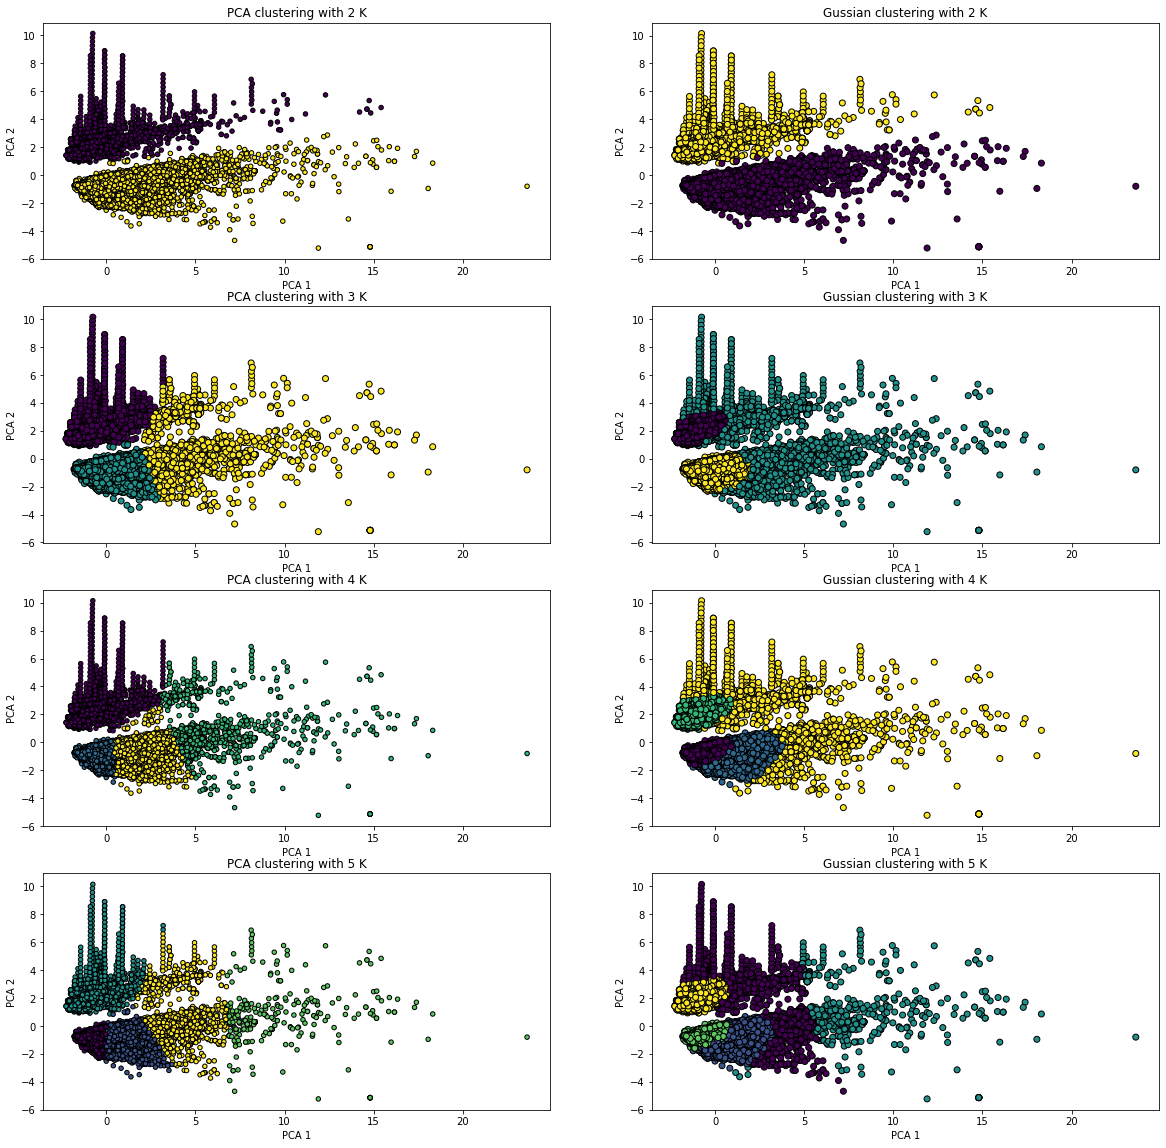

In [126]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.subplots(4, 2)
plt.subplot(4, 2, 1)
#Plot the data:
plt.subplot(4, 2, 1)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels2, s=20, edgecolor='k')
plt.title('PCA clustering with 2 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2') 

plt.subplot(4, 2, 2)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels_gmm2, edgecolor='k')
plt.title('Gussian clustering with 2 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


plt.subplot(4, 2, 3)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels3, edgecolor='k')
plt.title('PCA clustering with 3 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(4, 2, 4)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels_gmm3, edgecolor='k')
plt.title('Gussian clustering with 3 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


plt.subplot(4, 2, 5)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels4, s=20, edgecolor='k')
plt.title('PCA clustering with 4 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(4, 2, 6)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels_gmm4, edgecolor='k')
plt.title('Gussian clustering with 4 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


plt.subplot(4, 2, 7)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels5, s=20, edgecolor='k')
plt.title('PCA clustering with 5 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(4, 2, 8)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=pred_labels_gmm5, edgecolor='k')
plt.title('Gussian clustering with 5 K')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

> It seems that from the plots above, our model does the best clustering with having 2 clusters. The data points are devided into two seperate groups beautifully. But, how we can interpret our model in terms of each cluster?

> In the following part, we are going to add the lables which are related to each cluster into the dataframe consists of all features that we included to find any relation between each cluster and the features.

In [127]:
poc_fetures_to_include_df = products_orders_customers_df[features_to_include]

In [128]:
k2_labels = k2_means_model.labels_

In [129]:
poc_fetures_to_include_df['labels_k2'] = k2_labels

In [130]:
poc_fetures_to_include_df.head()

product_weight_g  price  product_photos_qty  freight_value  \
0             500.0  29.99                 4.0           8.72   
1             500.0  29.99                 4.0           8.72   
2             500.0  29.99                 4.0           8.72   
3             500.0  29.99                 4.0           7.78   
4             500.0  29.99                 4.0           7.78   

   volume_cubed_cm  payment_sequential  payment_installments  payment_value  \
0           1976.0                   1                     1          18.12   
1           1976.0                   3                     1           2.00   
2           1976.0                   2                     1          18.59   
3           1976.0                   1                     3          37.77   
4           1976.0                   1                     1          37.77   

   payment_type_billet  payment_type_credit_card  payment_type_debit_card  \
0                    0                         1                        0   
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         1                        0   
4                    0                         1                        0   

   payment_type_voucher  product_category_name_auto  \
0                     0                           0   
1                     1                           0   
2                     1                           0   
3                     0                           0   
4                     0                           0   

   product_category_name_baby  product_category_name_cool_stuff  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   product_category_name_electronics  product_category_name_furniture  \
0                                  0                                1   
1                                  0                                1   
2                                  0                                1   
3                                  0                                1   
4                                  0                                1   

   product_category_name_garden  product_category_name_health_beauty  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   product_category_name_sports_leisure  product_category_name_telephony  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   labels_k2  
0          1  
1          0  
2          0  
3          1  
4          1

In [131]:
labels_group = poc_fetures_to_include_df.groupby('labels_k2').sum()
labels_group

product_weight_g       price  product_photos_qty  freight_value  \
labels_k2                                                                    
0                12197851.0   549463.47             12487.0      100235.61   
1                37652774.0  2194042.03             39703.0      313940.66   

           volume_cubed_cm  payment_sequential  payment_installments  \
labels_k2                                                              
0               91257411.0                9080                  6022   
1              276959696.0               18860                 61677   

           payment_value  payment_type_billet  payment_type_credit_card  \
labels_k2                                                                 
0              823414.16               4252.0                       0.0   
1             3197299.90                 19.0                   18778.0   

           payment_type_debit_card  payment_type_voucher  \
labels_k2                                                  
0                            404.0                1366.0   
1                              4.0                   1.0   

           product_category_name_auto  product_category_name_baby  \
labels_k2                                                           
0                               196.0                       424.0   
1                               667.0                      1522.0   

           product_category_name_cool_stuff  \
labels_k2                                     
0                                     439.0   
1                                    1838.0   

           product_category_name_electronics  product_category_name_furniture  \
labels_k2                                                                       
0                                      857.0                           2244.0   
1                                     2336.0                           6273.0   

           product_category_name_garden  product_category_name_health_beauty  \
labels_k2                                                                      
0                                 277.0                                715.0   
1                                 722.0                               2761.0   

           product_category_name_sports_leisure  \
labels_k2                                         
0                                         603.0   
1                                        1942.0   

           product_category_name_telephony  
labels_k2                                   
0                                    267.0  
1                                    741.0

In [132]:
poc_fetures_to_include_df.labels_k2.value_counts()

1    18802
0     6022
Name: labels_k2, dtype: int64

In [133]:
poc_fetures_to_include_df.corrwith(poc_fetures_to_include_df.labels_k2 == 0)

product_weight_g                        0.002673
price                                  -0.068708
product_photos_qty                     -0.010002
freight_value                          -0.001855
volume_cubed_cm                         0.007824
payment_sequential                      0.217441
payment_installments                   -0.377797
payment_value                          -0.044731
payment_type_billet                     0.800757
payment_type_credit_card               -0.997376
payment_type_debit_card                 0.225458
payment_type_voucher                    0.426148
product_category_name_auto             -0.006851
product_category_name_baby             -0.016809
product_category_name_cool_stuff       -0.036913
product_category_name_electronics       0.023136
product_category_name_furniture         0.035212
product_category_name_garden            0.016572
product_category_name_health_beauty    -0.034729
product_category_name_sports_leisure   -0.004457
product_category_nam

In [134]:
poc_fetures_to_include_df.corrwith(poc_fetures_to_include_df.labels_k2 == 1)

product_weight_g                       -0.002673
price                                   0.068708
product_photos_qty                      0.010002
freight_value                           0.001855
volume_cubed_cm                        -0.007824
payment_sequential                     -0.217441
payment_installments                    0.377797
payment_value                           0.044731
payment_type_billet                    -0.800757
payment_type_credit_card                0.997376
payment_type_debit_card                -0.225458
payment_type_voucher                   -0.426148
product_category_name_auto              0.006851
product_category_name_baby              0.016809
product_category_name_cool_stuff        0.036913
product_category_name_electronics      -0.023136
product_category_name_furniture        -0.035212
product_category_name_garden           -0.016572
product_category_name_health_beauty     0.034729
product_category_name_sports_leisure    0.004457
product_category_nam

> From the information above, we see that there are correlation between customers and their payment information. Now, let's visulize the payment methods and clusters. 

In [135]:
poc_fetures_to_include_df

product_weight_g   price  product_photos_qty  freight_value  \
0                 500.0   29.99                 4.0           8.72   
1                 500.0   29.99                 4.0           8.72   
2                 500.0   29.99                 4.0           8.72   
3                 500.0   29.99                 4.0           7.78   
4                 500.0   29.99                 4.0           7.78   
...                 ...     ...                 ...            ...   
28819             300.0  369.90                 2.0          10.78   
28820           30000.0  399.99                 2.0          82.70   
28821             350.0   57.99                 1.0          27.26   
28822            2800.0  356.00                 1.0          18.12   
28823            2800.0  356.00                 1.0          18.12   

       volume_cubed_cm  payment_sequential  payment_installments  \
0               1976.0                   1                     1   
1               1976.0                   3                     1   
2               1976.0                   2                     1   
3               1976.0                   1                     3   
4               1976.0                   1                     1   
...                ...                 ...                   ...   
28819           1936.0                   1                     1   
28820         201600.0                   1                     6   
28821           2964.0                   1                     1   
28822          14812.0                   1                    10   
28823          14812.0                   1                    10   

       payment_value  payment_type_billet  payment_type_credit_card  \
0              18.12                    0                         1   
1               2.00                    0                         0   
2              18.59                    0                         0   
3              37.77                    0                         1   
4              37.77                    0                         1   
...              ...                  ...                       ...   
28819         380.68                    1                         0   
28820         482.69                    0                         1   
28821          85.25                    0                         1   
28822         748.24                    0                         1   
28823         748.24                    0                         1   

       payment_type_debit_card  payment_type_voucher  \
0                            0                     0   
1                            0                     1   
2                            0                     1   
3                            0                     0   
4                            0                     0   
...                        ...                   ...   
28819                        0                     0   
28820                        0                     0   
28821                        0                     0   
28822                        0                     0   
28823                        0                     0   

       product_category_name_auto  product_category_name_baby  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
28819                           0                           0   
28820                           0                           0   
28821                           0                           0   
28822                           0                           0   
28823                           0                           0   

       product_category_name_cool_stuff  p

In [136]:
billet_labels_sum = poc_fetures_to_include_df.groupby('labels_k2').sum()['payment_type_billet']

In [137]:
voucher_labels_sum = poc_fetures_to_include_df.groupby('labels_k2').sum()['payment_type_voucher']

In [138]:
debit_labels_sum = poc_fetures_to_include_df.groupby('labels_k2').sum()['payment_type_debit_card']

In [139]:
credit_labels_sum = poc_fetures_to_include_df.groupby('labels_k2').sum()['payment_type_credit_card']

Text(0, 0.5, 'Using Credit')

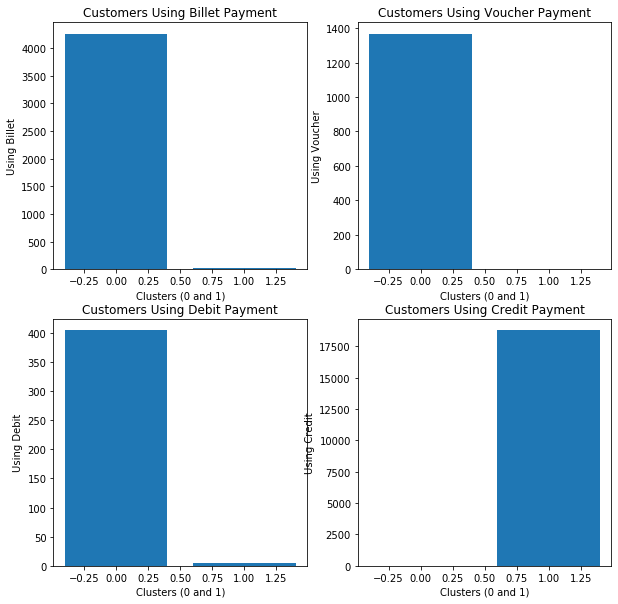

In [140]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplots(4, 2)
plt.subplot(2, 2, 1)
#Plot the data:

plt.subplot(2, 2, 1)
plt.bar(billet_labels_sum.index,
        billet_labels_sum.values)
plt.title('Customers Using Billet Payment')
plt.xlabel('Clusters (0 and 1)')
plt.ylabel('Using Billet') 

plt.subplot(2, 2, 2)
plt.bar(voucher_labels_sum.index,
        voucher_labels_sum.values)
plt.title('Customers Using Voucher Payment')
plt.xlabel('Clusters (0 and 1)')
plt.ylabel('Using Voucher') 


plt.subplot(2, 2, 3)
plt.bar(debit_labels_sum.index,
        debit_labels_sum.values)
plt.title('Customers Using Debit Payment')
plt.xlabel('Clusters (0 and 1)')
plt.ylabel('Using Debit') 

plt.subplot(2, 2, 4)
plt.bar(credit_labels_sum.index,
        credit_labels_sum.values)
plt.title('Customers Using Credit Payment')
plt.xlabel('Clusters (0 and 1)')
plt.ylabel('Using Credit') 

> From the information above, we can group the customers into two groups. First, who are willing to use more cashy methods like  debit card and voucher, second group are willing to use more credit card.


## Sentiment Analysis

> In this part we want to make a sentiment prediction based on the customers' reviews using review scores. But, in this project the goal is make a prediction in a binary form (good or bad sentiment).

> For training model, we used random forest.

In [141]:
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [142]:
order_reviews_df.dropna(how = 'any', inplace = True)

In [143]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 9 to 99975
Data columns (total 7 columns):
review_id                  9986 non-null object
order_id                   9986 non-null object
review_score               9986 non-null int64
review_comment_title       9986 non-null object
review_comment_message     9986 non-null object
review_creation_date       9986 non-null object
review_answer_timestamp    9986 non-null object
dtypes: int64(1), object(6)
memory usage: 624.1+ KB


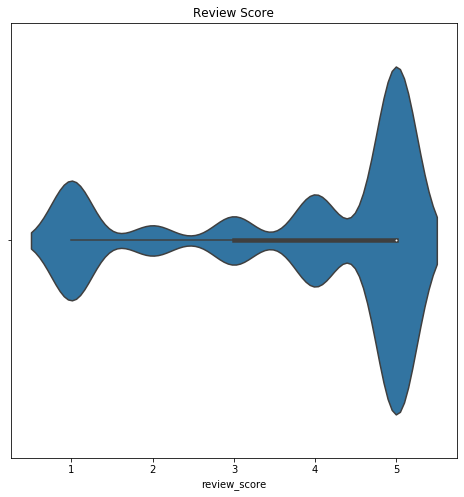

In [144]:
plt.figure(figsize = (8, 8))
sns.violinplot(order_reviews_df['review_score'])
plt.title("Review Score")
plt.show()

>As we can see, most of the review score are above 3 stars. So we can change the rating more than 3 to 1 and the less than 3 to 0.

In [145]:
# define a new column to show us how long the review messages are:
order_reviews_df['review_length'] = order_reviews_df['review_comment_message'].apply(len)
order_reviews_df.head()

review_id                          order_id  \
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
19  373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
22  d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
34  c92cdd7dd544a01aa35137f901669cdf  37e7875cdce5a9e5b3a692971f370151   

    review_score     review_comment_title  \
9              4                recomendo   
15             5          Super recomendo   
19             1  Não chegou meu produto    
22             5                    Ótimo   
34             4               Muito bom.   

                               review_comment_message review_creation_date  \
9   aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
15  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   
19                                            Péssimo  2018-08-15 00:00:00   
22                                       Loja nota 10  2018-07-10 00:00:00   
34  Recebi exatamente o que esperava. As demais en...  2018-06-07 00:00:00   

   review_answer_timestamp  review_length  
9      2018-05-23 16:45:47            174  
15     2018-05-24 03:00:01             56  
19     2018-08-15 04:10:37              7  
22     2018-07-11 14:10:25             12  
34     2018-06-09 18:44:02            112

> Let's see the distribution of the review messeges length to see an average of the length of the reviews written by the customers for each purchase.

In [146]:
fig_len = px.histogram(order_reviews_df, x="review_length", nbins = 100, width = 500, height = 500)
fig_len.show()

>The plot above, shows a distribution of length of the reviews written by the customers. Most of the reviews are short that is about 2 to 10 words longer. Some people write more than 50 words, but they are few.

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(order_reviews_df['review_comment_message']) #learn a vocabulary
words_sum = words.sum(axis=0)


words_freq = [(word, words_sum[0, index]) for word, index in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_frequency = pd.DataFrame(words_freq, columns=['word', 'frequency'])

In [149]:
words_frequency.head()

word  frequency
0  produto       4573
1      não       2401
2    muito       2079
3    prazo       2064
4      que       2007

In [150]:
words_frequency.frequency.values[:10]

array([4573, 2401, 2079, 2064, 2007, 1566, 1534, 1477, 1355, 1182],
      dtype=int64)

In [151]:
# The tranlation in this part is done manually for the first top 10 words
top_10_words_English = ['product', 'not', 'very', 'term','what','delivery','with','before','has arrived','good']

fig_10_words = go.Figure()

fig_10_words = px.bar(x = top_10_words_English,
             y = words_frequency.frequency.values[:10], width = 500, height = 500)

fig_10_words.update_layout(
    xaxis_title="word",
    yaxis_title="frequency",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
             )
                 )
fig_10_words.show()

> First, we train the model based on the review score from 1 to 5:

In [152]:
import spacy
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!python -m spacy download en_core_web_md

stopwords = stopwords.words('english')
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051308 sha256=46c096160443e1c9b8d125ab9d12f1b1effeb15de059063f6b1256be0dbce48b
  Stored in directory: C:\Users\Mona\AppData\Local\Temp\pip-ephem-wheel-cache-gk4dykp2\wheels\df\94\ad\f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


>Define a function does cleaning our text and preparing for training:

In [153]:
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    table = str.maketrans({key: None for key in string.punctuation})

    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        ###Convert text to lowercase, strip whitespace and remove personal pronouns
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        ###Remove stopwords
        tokens = [tok.translate(table) for tok in tokens if tok not in stopwords ]
        tokens = ' '.join(tokens)
        #Remove extra whitespace
        tokens = ' '.join(tokens.split())
        texts.append(tokens)
    return pd.Series(texts)

In [154]:
X = cleanup_text(order_reviews_df["review_comment_message"], logging=True)

Processed 1000 out of 9986 documents.
Processed 2000 out of 9986 documents.
Processed 3000 out of 9986 documents.
Processed 4000 out of 9986 documents.
Processed 5000 out of 9986 documents.
Processed 6000 out of 9986 documents.
Processed 7000 out of 9986 documents.
Processed 8000 out of 9986 documents.
Processed 9000 out of 9986 documents.


In [155]:
y = order_reviews_df['review_score'].values

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
counter_vectorizer_model = CountVectorizer(max_features=4000, min_df=5, max_df=0.7)
X_cv = counter_vectorizer_model.fit_transform(X).toarray()

In [157]:
#training and testing
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size = 0.2, random_state = 0)

print(X_train_cv.shape)
print(y_train_cv.shape)
print(X_test_cv.shape)
print(y_test_cv.shape)

(7988, 1555)
(7988,)
(1998, 1555)
(1998,)


In [158]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_cv, y_train_cv)

y_pred_cv = random_forest_model.predict(X_test_cv)

print("Training Accuracy using Counter Vectorizer :", random_forest_model.score(X_train_cv, y_train_cv))
print("Testing Accuracy using Counter Vectorizer:", random_forest_model.score(X_test_cv, y_test_cv))

conf_matrix = confusion_matrix(y_test_cv, y_pred_cv)
print(conf_matrix)


Training Accuracy using Counter Vectorizer : 0.9496745117676515
Testing Accuracy using Counter Vectorizer: 0.6526526526526526
[[294  10   7  10  37]
 [ 65   5   2   3  16]
 [ 68   5  12  14  47]
 [ 42   2  14  36 217]
 [ 52   1  10  72 957]]


We set the max_features parameter to 4000, which means that we want to use 4000 most occurring words (half of the whole datapoints) as features for training our classifier.  Because the words that have a very low frequency of occurrence are not a good parameter for classifying documents. min_df is corresponding to the minumum number of documents that should contain this feature and max_df means that we should include only those words that occur in a maximum of 70% of all the documents.  

>**TFIDF** Now we are going to use the TFIDF model to convert text documents into numerical data:

In [159]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_cv).toarray()

In [160]:
#training and testing
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 0)

print(X_train_tfidf.shape)
print(y_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_test_tfidf.shape)

(7988, 1555)
(7988,)
(1998, 1555)
(1998,)


In [161]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = random_forest_model.predict(X_test_tfidf)

print("Training Accuracy using TFIDF :", random_forest_model.score(X_train_tfidf, y_train_tfidf))
print("Testing Accuracy using TFIDF:", random_forest_model.score(X_test_tfidf, y_test_tfidf))

conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)
print(conf_matrix)


Training Accuracy using TFIDF : 0.9508012018027041
Testing Accuracy using TFIDF: 0.6756756756756757
[[ 304    5   14    3   32]
 [  58    6    4    3   20]
 [  72    1   10   11   52]
 [  46    2   11   23  229]
 [  42    1    7   35 1007]]


>Let's see if we convert review score in a binary form (from 0 to 1) as opposed to 1 to 5, what happen to our model in terms of testing accuracy score. We set 0 if the review score is below than 3 otherwise is set to 1.

In [162]:
order_reviews_df['rating_binary'] = np.where(order_reviews_df['review_score'] >= 3, 1, 0)

> Now, set the y variable to the binary form and fit the model again to see the new results:

In [163]:
y_binary = order_reviews_df['rating_binary']

In [164]:
#training and testing
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_binary, test_size = 0.2, random_state = 0)

print(X_train_cv.shape)
print(y_train_cv.shape)
print(X_test_cv.shape)
print(y_test_cv.shape)

(7988, 1555)
(7988,)
(1998, 1555)
(1998,)


In [165]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_cv, y_train_cv)

y_pred_cv = random_forest_model.predict(X_test_cv)

print("Training Accuracy using Counter Vectorizer :", random_forest_model.score(X_train_cv, y_train_cv))
print("Testing Accuracy using Counter Vectorizer:", random_forest_model.score(X_test_cv, y_test_cv))

Training Accuracy using Counter Vectorizer : 0.991862794191287
Testing Accuracy using Counter Vectorizer: 0.8888888888888888


In [166]:
conf_matrix = confusion_matrix(y_test_cv, y_pred_cv)
print(conf_matrix)

[[ 357   92]
 [ 130 1419]]


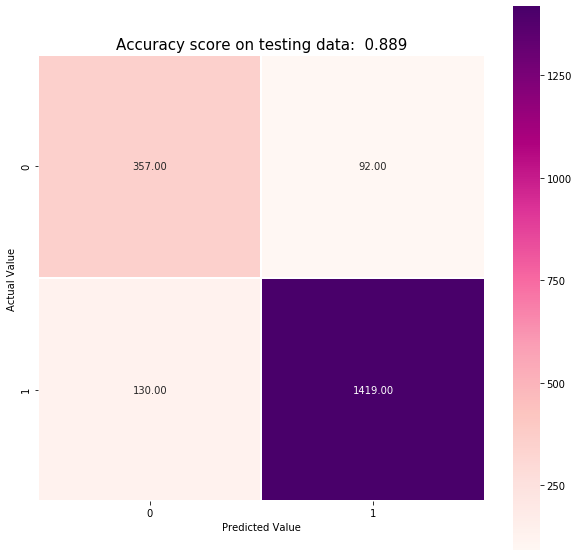

In [167]:
plt.figure(figsize = (10, 10));
ax = sns.heatmap(conf_matrix, annot = True, fmt = '.2f', linewidths = 1, square = True, cmap = 'RdPu');
plt.xlabel('Predicted Value');
plt.ylabel('Actual Value');
plt.title(f"Accuracy score on testing data: {random_forest_model.score(X_test_cv, y_test_cv) : 0.3}", size = 15)
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);

In [168]:
#training and testing
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_binary, test_size = 0.2, random_state = 0)

print(X_train_tfidf.shape)
print(y_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_test_tfidf.shape)

(7988, 1555)
(7988,)
(1998, 1555)
(1998,)


In [169]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = random_forest_model.predict(X_test_tfidf)

print("Training Accuracy using TFIDF :", random_forest_model.score(X_train_tfidf, y_train_tfidf))
print("Testing Accuracy using TFIDF :", random_forest_model.score(X_test_tfidf, y_test_tfidf))

Training Accuracy using TFIDF : 0.9902353530295444
Testing Accuracy using TFIDF : 0.8853853853853854


In [170]:
conf_matrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)
print(conf_matrix)

[[ 346  103]
 [ 126 1423]]


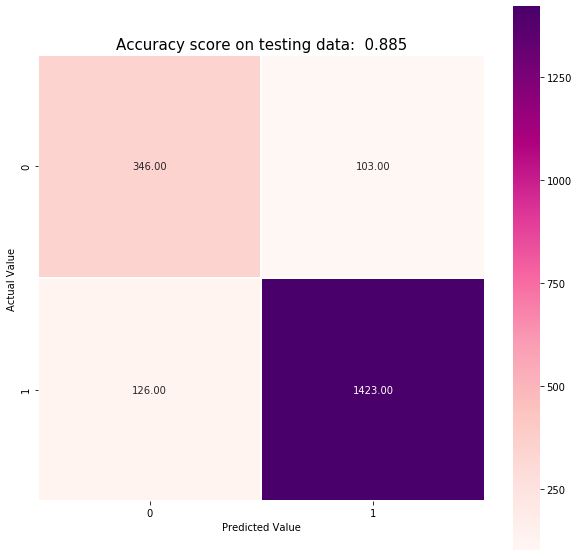

In [171]:
plt.figure(figsize = (10, 10));
ax = sns.heatmap(conf_matrix, annot = True, fmt = '.2f', linewidths = 1, square = True, cmap = 'RdPu');
plt.xlabel('Predicted Value');
plt.ylabel('Actual Value');
plt.title(f"Accuracy score on testing data: {random_forest_model.score(X_test_tfidf, y_test_tfidf) : 0.3}", size = 15)
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);

> New results are extremely better than the previous model using 5 labels. So, we can have a prediction on reviews as a good or bad (0 or 1) review with 88% of accuracy.